In [1]:
import sys

In [44]:
import sys
from functools import lru_cache

def tsp(cost):
    n = len(cost)
    @lru_cache(maxsize=None)
    def dp(mask, pos):
        if mask == (1<<n)-1: # bitmask for converting 2^n - 1 to binary
            return cost[pos][0]
        ans = sys.maxsize
        for i in range(n):
            if (mask & (1<<i))==0:
                ans = min(ans, cost[pos][i] + dp(mask | (1<<i), i))
        return ans
    return dp(1, 0)

# Example usage
cost = [
    [0,10,15,20],
    [10,0,35,25],
    [15,35,0,35],
    [20,25,30,0]
]
print('Minimum tour cost:', tsp(cost))


Minimum tour cost: 80


The graph is connected.


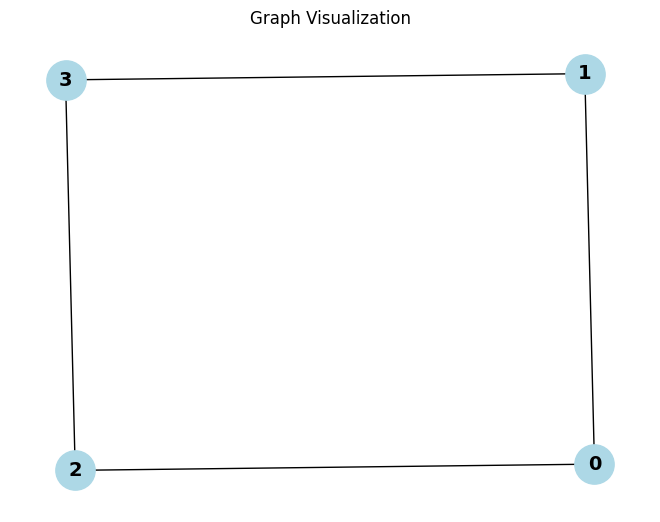

In [7]:
import matplotlib.pyplot as plt
import networkx as nx

# DFS function
def dfs(graph, node, visited):
    visited[node] = True
    for neighbor in graph[node]:
        if not visited[neighbor]:
            dfs(graph, neighbor, visited)

# Function to check if the graph is connected
def is_connected(graph):
    visited = {node: False for node in graph}
    start_node = list(graph.keys())[0]
    dfs(graph, start_node, visited)
    return all(visited.values())

# Example graph as adjacency list
graph = {
    0: [1, 2],
    1: [0, 3],
    2: [0, 3],
    3: [1, 2]
}

# Check connectivity
if is_connected(graph):
    print("The graph is connected.")
else:
    print("The graph is not connected.")

# Display the graph
G = nx.Graph()
for node, neighbors in graph.items():
    for neighbor in neighbors:
        G.add_edge(node, neighbor)

# Draw the graph
nx.draw(G, with_labels=True, node_color='lightblue', node_size=800, font_size=14, font_weight='bold')
plt.title("Graph Visualization")
plt.show()

Nodes reachable from A using BFS:
['A', 'B', 'C', 'D', 'E', 'F']


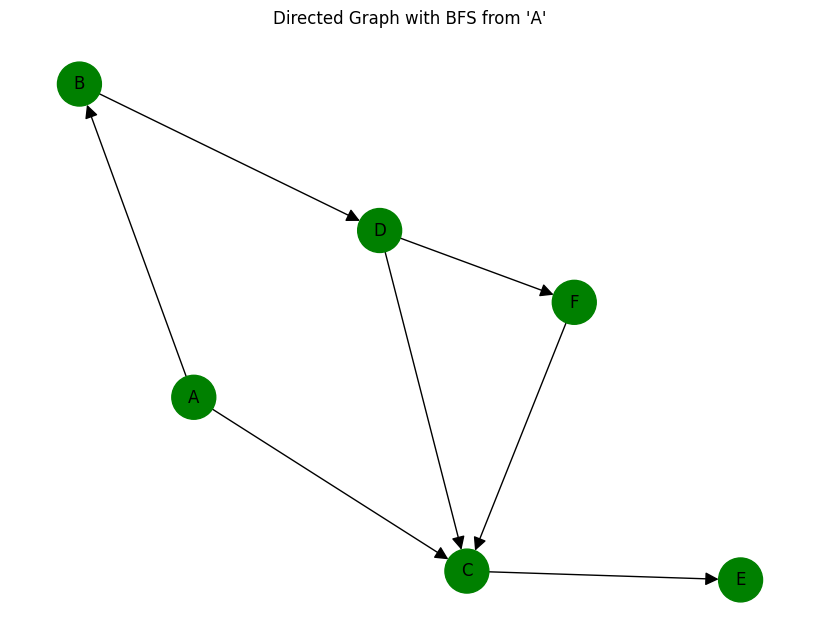

In [32]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

def bfs_reachable(graph, start):
    visited = set()
    queue = deque([start])
    order = []  # To store the BFS traversal order

    while queue:
        node = queue.popleft()
        if node not in visited:
            visited.add(node)
            order.append(node)
            for neighbor in graph.get(node, []):
                if neighbor not in visited:
                    queue.append(neighbor)
    return order

# Create a directed graph
graph = {
    'A': ['B', 'C'],
    'B': ['D'],
    'C': ['E'],
    'D': ['C', 'F'],
    'E': [],
    'F': ['C']
}

# Perform BFS
start_node = 'A'
reachable_nodes = bfs_reachable(graph, start_node)
print(f"Nodes reachable from {start_node} using BFS:")
print(reachable_nodes)

# Visualize the graph
G = nx.DiGraph()

# Add edges
for node, neighbors in graph.items():
    for neighbor in neighbors:
        G.add_edge(node, neighbor)

# Set node colors: visited nodes in green, others in lightblue
node_colors = ['green' if node in reachable_nodes else 'lightblue' for node in G.nodes()]

plt.figure(figsize=(8,6))
pos = nx.spring_layout(G)  # Layout for nodes
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=1000, arrowsize=20)
plt.title(f"Directed Graph with BFS from '{start_node}'")
plt.show()